In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

In [2]:
#import dataset
covid= pd.read_csv("owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
#checking columns in the dataset
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
#drop irrelevant data columns
covid_new = covid.drop(['iso_code', 'new_cases', 'new_deaths','total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'new_vaccinations', 
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],axis=1)

In [5]:
#checking for missing data
covid_new.isnull().sum()

continent                      8864
location                          0
date                              0
total_cases                    7762
new_cases_smoothed             8807
total_deaths                  19119
new_deaths_smoothed            8807
icu_patients                 122282
hosp_patients                119840
total_tests                   80819
new_tests_smoothed            68994
total_vaccinations           102758
people_vaccinated            104381
people_fully_vaccinated      107313
total_boosters               129946
new_vaccinations_smoothed     73438
dtype: int64

In [6]:
covid_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139382 entries, 0 to 139381
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   continent                  130518 non-null  object 
 1   location                   139382 non-null  object 
 2   date                       139382 non-null  object 
 3   total_cases                131620 non-null  float64
 4   new_cases_smoothed         130575 non-null  float64
 5   total_deaths               120263 non-null  float64
 6   new_deaths_smoothed        130575 non-null  float64
 7   icu_patients               17100 non-null   float64
 8   hosp_patients              19542 non-null   float64
 9   total_tests                58563 non-null   float64
 10  new_tests_smoothed         70388 non-null   float64
 11  total_vaccinations         36624 non-null   float64
 12  people_vaccinated          35001 non-null   float64
 13  people_fully_vaccinated    32

In [7]:
#Fill missing values with 0
covid_new.fillna(0, inplace = True)

<AxesSubplot:>

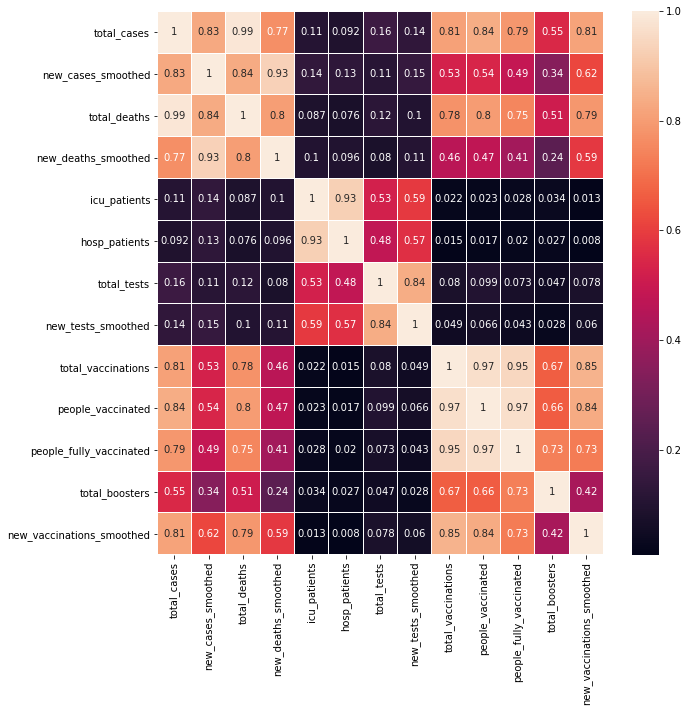

In [8]:
#visualizing the concentration of values between two dimensions of matrixes using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(covid_new.corr(),annot=True, linewidths=.01)

In [9]:
# Splitting data into testing and training.
training = pd.DataFrame()
testing = pd.DataFrame()

# Split 20% for each location in the data.
for i in covid_new['location'].value_counts().index:
    train, test = train_test_split(covid_new[covid_new['location']==i], test_size=0.2, shuffle=False)
    training = pd.concat([training,train])
    testing = pd.concat([testing,test])

In [10]:
#after splitting we add a column call "train_data" as the target column
training['train_data'] = 1
testing['train_data'] = 0
covid_new = pd.concat([training,testing])

In [11]:
#Data exploration & visualization

In [12]:
#separating the dataset by categorical and numerical data
df_cat = training[['continent','location','date']]
df_num = training[['total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients','hosp_patients',
                   'total_tests','new_tests_smoothed','total_vaccinations','people_vaccinated','people_fully_vaccinated',
                   'total_boosters','new_vaccinations_smoothed']]

In [13]:
colors = ['red','orange','blue','green','yellow','purple','darkblue','pink','lightblue']

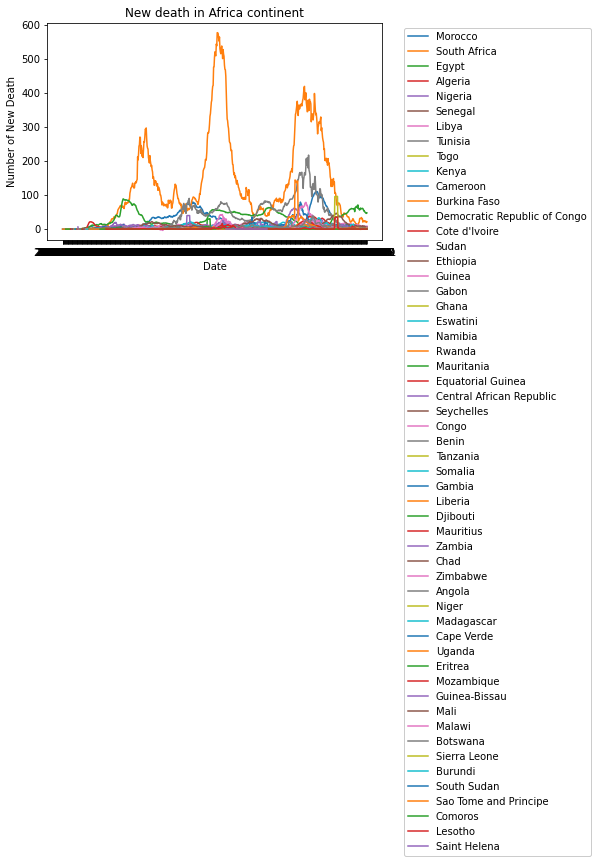

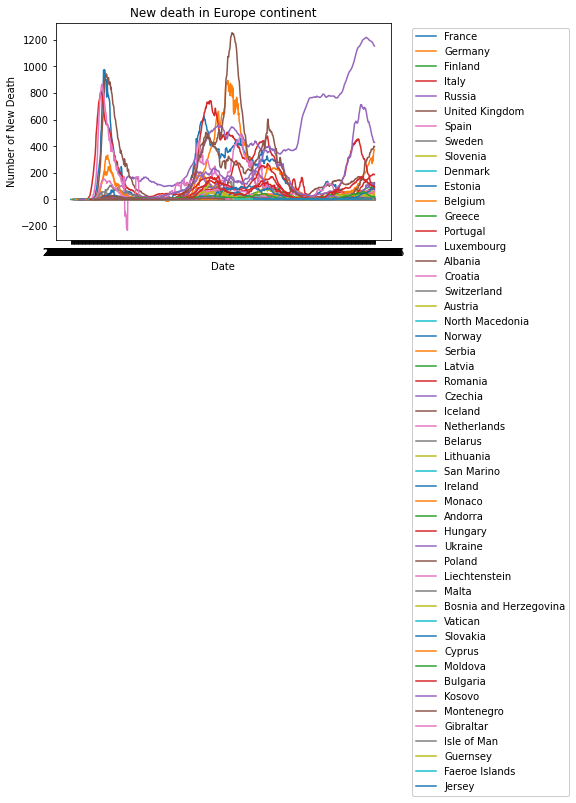

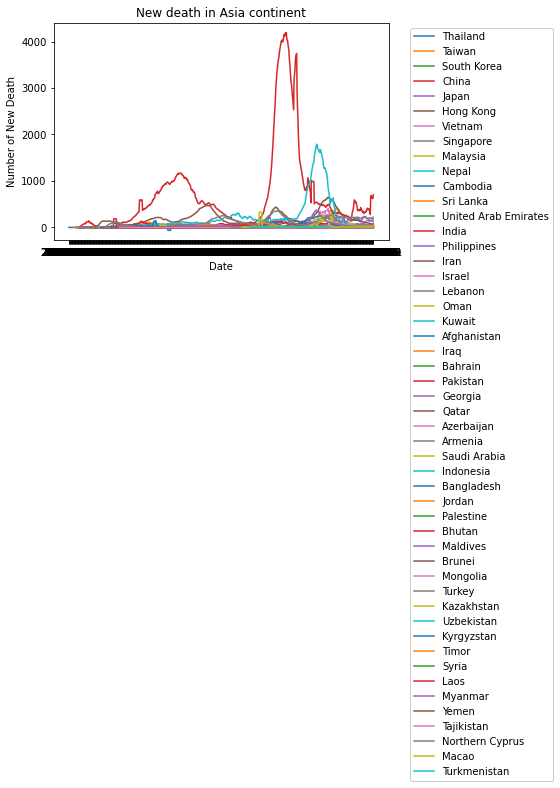

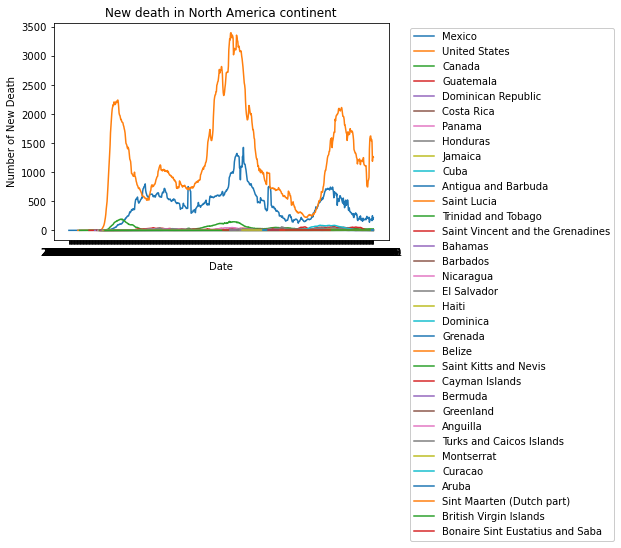

TypeError: can only concatenate str (not "int") to str

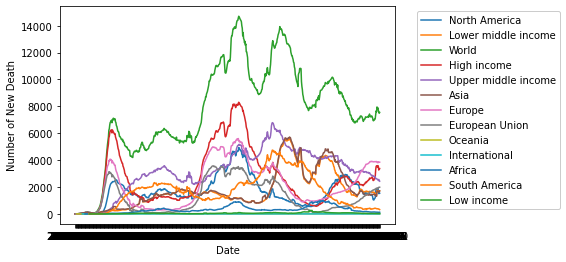

In [14]:
#data exploration for the number of deaths for each continent
for i in covid_new['continent'].value_counts().index:
    for j in covid_new[covid_new['continent']==i]['location'].value_counts().index:
        x_axis = covid_new[covid_new['location']== j]['date']
        plt.plot(x_axis,covid_new[covid_new['location']== j]['new_deaths_smoothed'],label=j)
    plt.xlabel('Date')
    plt.ylabel('Number of New Death')
    plt.legend(framealpha=1,bbox_to_anchor=(1.05, 1),loc='upper left');
    plt.title('New death in '+i+' continent')
    plt.show()

Text(0.5, 1.0, 'New death in Asia')

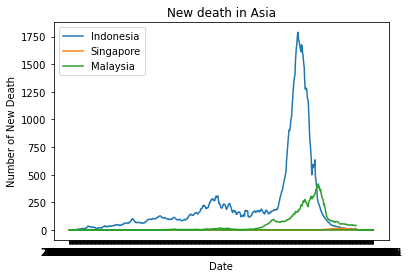

In [15]:
countries = ["Indonesia","Singapore","Malaysia"]
for i in countries:
    plt.plot(covid_new[covid_new['location']== i]['date'],covid_new[covid_new['location']== i]['new_deaths_smoothed'])

plt.legend(countries)
plt.xlabel('Date')
plt.ylabel('Number of New Death')
plt.title('New death in Asia')

In [16]:
covid_malaysia = covid_new[covid_new["location"]=="Malaysia"]

<AxesSubplot:xlabel='total_cases', ylabel='new_deaths_smoothed'>

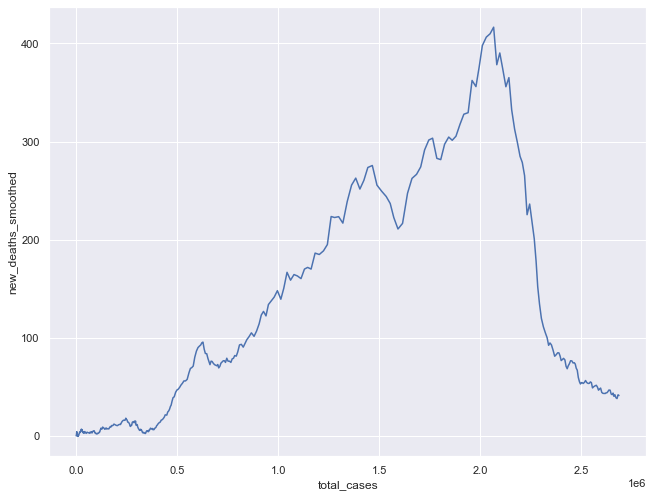

In [17]:
#plotting new deaths against total cases
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x=covid_malaysia['total_cases'],y=covid_malaysia['new_deaths_smoothed'])

<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='new_cases_smoothed'>

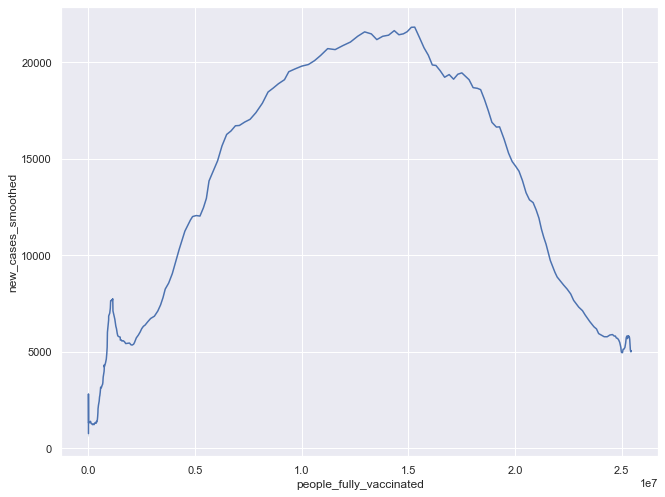

In [18]:
#plotting new cases against people fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x=covid_malaysia['people_fully_vaccinated'],y=covid_malaysia['new_cases_smoothed'])

<AxesSubplot:xlabel='people_fully_vaccinated', ylabel='new_deaths_smoothed'>

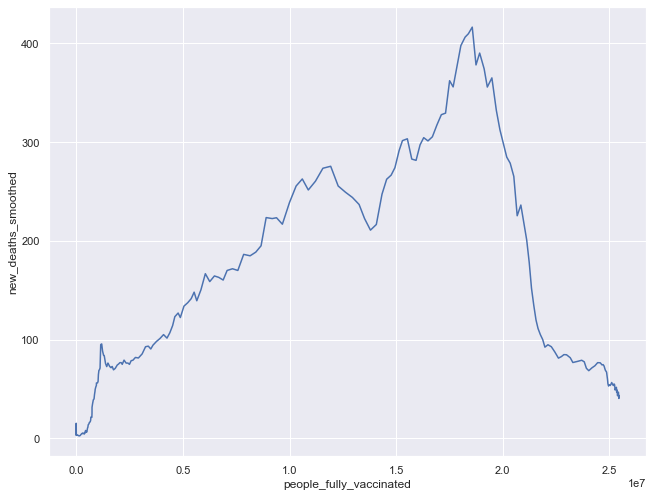

In [19]:
#plotting new deaths against people fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x=covid_malaysia['people_fully_vaccinated'],y=covid_malaysia['new_deaths_smoothed'])

In [20]:
#Feature engineering
covid_new['date'] = covid_new['date'].apply(lambda x : float(''.join(x.split('-'))) if str(x) else x)

In [21]:
#data preprocessing
covid_new['continent'] = covid_new['continent'].apply(lambda x : "World" if pd.isna(x) else x )

In [22]:
all_dummies = pd.get_dummies(covid_new[['location','date','train_data','total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients','hosp_patients',
                   'total_tests','new_tests_smoothed','total_vaccinations','people_vaccinated','people_fully_vaccinated',
                   'total_boosters','new_vaccinations_smoothed']])

X_train = all_dummies[all_dummies['train_data']==1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test = all_dummies[all_dummies['train_data']==0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train = covid_new[covid_new['train_data']==1]['total_deaths']
Y_test = covid_new[covid_new['train_data']==0]['total_deaths']
# Y_train = Y_train.astype('int')
# Y_test = Y_test.astype('int')
X_train.shape

(111406, 250)

In [23]:
## Scale the data for our model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['date','train_data','total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients','hosp_patients',
                   'total_tests','new_tests_smoothed','total_vaccinations','people_vaccinated','people_fully_vaccinated',
                   'total_boosters','new_vaccinations_smoothed']]= scale.fit_transform(all_dummies_scaled[['date','train_data','total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients','hosp_patients',
                   'total_tests','new_tests_smoothed','total_vaccinations','people_vaccinated','people_fully_vaccinated',
                   'total_boosters','new_vaccinations_smoothed']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_data'] == 1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_data'] == 0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train_scaled = all_dummies_scaled[all_dummies_scaled['train_data']==1]['total_deaths']
Y_test_scaled = all_dummies_scaled[all_dummies_scaled['train_data']==0]['total_deaths']
Y_train_scaled = Y_train_scaled.astype('int')
Y_test_scaled = Y_test_scaled.astype('int')

In [24]:
## Data Modification

all_dummies = pd.get_dummies(covid_new[['location','date','train_data','total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 'icu_patients','hosp_patients',
                   'total_tests','new_tests_smoothed','total_vaccinations','people_vaccinated','people_fully_vaccinated',
                   'total_boosters','new_vaccinations_smoothed']])
                
X_train = all_dummies[all_dummies['train_data']==1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test = all_dummies[all_dummies['train_data']==0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train = covid_new[covid_new['train_data']==1]['total_deaths']
Y_test = covid_new[covid_new['train_data']==0]['total_deaths']
# Y_train = Y_train.astype('int')
# Y_test = Y_test.astype('int')
X_train.shape

(111406, 250)

In [25]:
Malaysia_dummies = all_dummies[all_dummies['location_Malaysia']==1]

X_Malaysia = Malaysia_dummies.drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
Y_Malaysia = covid_new[covid_new['location']=='Indonesia']['total_deaths']

X_train_Malaysia = Malaysia_dummies[Malaysia_dummies['train_data']==1].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)
X_test_Malaysia = Malaysia_dummies[Malaysia_dummies['train_data']==0].drop(['train_data'],axis=1).drop(['total_deaths'],axis=1)

Y_train_Malaysia = covid_new[covid_new['train_data']==1][covid_new[covid_new['train_data']==1]["location"]=="Malaysia"]['total_deaths']
Y_test_Malaysia = covid_new[covid_new['train_data']==0][covid_new[covid_new['train_data']==0]["location"]=="Malaysia"]['total_deaths']

X_test_Malaysia.shape

(138, 250)

In [26]:
X_train_Malaysia

,date,total_cases,new_cases_smoothed,new_deaths_smoothed,icu_patients,hosp_patients,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,...,location_Uzbekistan,location_Vanuatu,location_Vatican,location_Venezuela,location_Vietnam,location_Wallis and Futuna,location_World,location_Yemen,location_Zambia,location_Zimbabwe
77084,20200124.0,0.0,0.000,0.000,0.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
77085,20200125.0,4.0,0.000,0.000,0.0,0.0,7.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
77086,20200126.0,4.0,0.000,0.000,0.0,0.0,21.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
77087,20200127.0,4.0,0.000,0.000,0.0,0.0,45.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
77088,20200128.0,4.0,0.000,0.000,0.0,0.0,98.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77629,20210722.0,964918.0,12019.429,137.286,1373.0,11286.0,20330900.0,130273.0,16395384.0,11167516.0,...,0,0,0,0,0,0,0,0,0,0
77630,20210723.0,980491.0,12452.571,141.429,1356.0,11398.0,20487343.0,132086.0,16873119.0,11481707.0,...,0,0,0,0,0,0,0,0,0,0
77631,20210724.0,996393.0,12934.571,148.000,1399.0,11783.0,20625337.0,132472.0,17305904.0,11777352.0,...,0,0,0,0,0,0,0,0,0,0
77632,20210725.0,1013438.0,13839.571,139.286,1438.0,12022.0,20745156.0,133873.0,17722509.0,12069565.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#saving dataset for Malaysia
covid_new[covid_new["location"]=="Malaysia"].to_csv('Malaysia.csv',index=False)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose  import make_column_transformer
from sklearn.pipeline import make_pipeline

In [29]:
covid_LR = LinearRegression()

covid_LR.fit(X_train_Malaysia,Y_train_Malaysia)
y_pred_linear = covid_LR.predict(X_test_Malaysia)

print("Variance Score:",explained_variance_score(Y_test_Malaysia, y_pred_linear, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Malaysia, y_pred_linear))

Variance Score: -25959645.21657737
Mean Squared Error Score: 1657512342051326.2


In [30]:
#model saving and loading (without tuning)
model_LR = 'covid_LR_model.sav'
pickle.dump(covid_LR, open('model_LR', 'wb'))

In [31]:
covid_LR = pickle.load(open('model_LR', 'rb'))

In [32]:
#model tuning & evaluation

In [33]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [34]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Parameters: ' + str(classifier.best_params_))

In [35]:
covid_LR = LinearRegression()
param_grid = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'copy_X':[True,False],
}
clf_linear = GridSearchCV(covid_LR, param_grid = param_grid , verbose = True , n_jobs = -1)
best_clf_linear = clf_linear.fit(X_train_Malaysia,Y_train_Malaysia)
clf_performance(best_clf_linear,'Linear Regression')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Linear Regression
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.7s finished


In [36]:
# Tuned Models
tuned_linear = best_clf_linear.best_estimator_

In [37]:
y_pred_tuned_linear = tuned_linear.predict(X_test_Malaysia)
print("Variance Score:",explained_variance_score(Y_test_Malaysia, y_pred_tuned_linear, multioutput='uniform_average'))
print("Mean Squared Error Score:",mean_squared_error(Y_test_Malaysia, y_pred_tuned_linear))

Variance Score: -25959645.21657737
Mean Squared Error Score: 1657512342051326.2


In [38]:
#model fitting & saving

In [39]:
tuned_linear.fit(X_train_Malaysia,Y_train_Malaysia)
pickle.dump(tuned_linear, open('model_LR', 'wb'))

In [40]:
#model loading & predictions

In [41]:
X_train_Malaysia.columns

Index(['date', 'total_cases', 'new_cases_smoothed', 'new_deaths_smoothed',
       'icu_patients', 'hosp_patients', 'total_tests', 'new_tests_smoothed',
       'total_vaccinations', 'people_vaccinated',
       ...
       'location_Uzbekistan', 'location_Vanuatu', 'location_Vatican',
       'location_Venezuela', 'location_Vietnam', 'location_Wallis and Futuna',
       'location_World', 'location_Yemen', 'location_Zambia',
       'location_Zimbabwe'],
      dtype='object', length=250)

In [42]:
X_train_Malaysia['date'] = pd.to_datetime(X_train_Malaysia['date'], format='%Y%m%d')

Text(0.5, 1.0, 'Total Death in Malaysia')

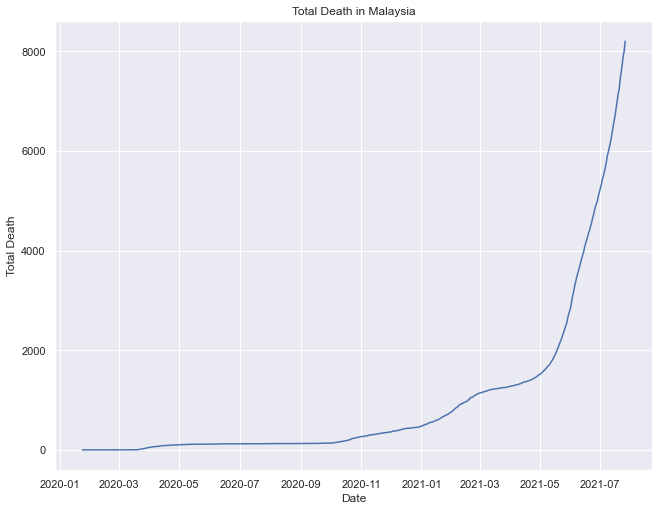

In [43]:
plt.plot(X_train_Malaysia['date'],Y_train_Malaysia)
plt.xlabel("Date")
plt.ylabel("Total Death")
plt.title("Total Death in Malaysia")

In [44]:
X_train_Malaysia = X_train_Malaysia.drop(columns='date')

In [ ]:
State_trans=make_column_transformer((OneHotEncoder(sparse=False, handle_unknown= 'ignore'),['State/UTs']),remainder='passthrough')

In [ ]:
dt=RandomForestRegressor()

In [ ]:
pipe= make_pipeline(State_trans,scaler,dt)

In [ ]:
pipe.fit(train_x,train_y)

In [ ]:
y_pred_dt= pipe.predict(test_x)

In [ ]:
y_pred_dt

In [ ]:
test_x

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_y, y_pred_dt)

In [ ]:
pickle.dump(pipe,open('Covid-19_India_Status.pkl','wb'))

In [ ]:
loadedModel=pickle.load(open('Covid-19_India_Status.pkl','rb'))

In [ ]:
pipe.predict(pd.DataFrame(data=[('Bihar',725605,102,715853)],columns=['State/UTs','Total Cases','Active','Discharged']))[0]